**Sales Price Prediction**

**Introduction**

Welcome to the *Sales Price Prediction* notebook! In this project, we will dive into predictive analytics by building a linear regression model to estimate sales based on advertising expenditures. Sales forecasting plays a crucial role for businesses, helping them optimize marketing strategies and allocate budgets more effectively.

**Dataset Overview**

We'll be working with the *Advertising* dataset, which tracks the budgets allocated to three different media channels—TV, Radio, and Newspaper—and the corresponding sales figures. This dataset provides a great opportunity to analyze how each advertising medium influences sales and to develop a model that predicts future sales based on the advertising investments.

Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# To rename the column 'Unnamed: 0' to 'Index'
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [4]:
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


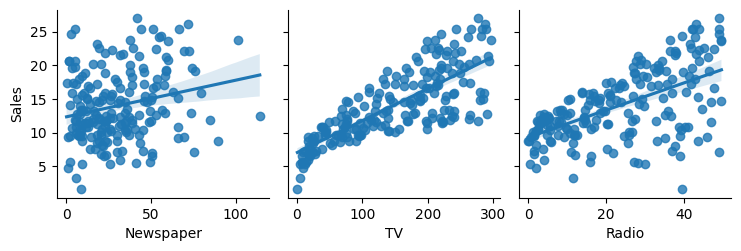

In [7]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

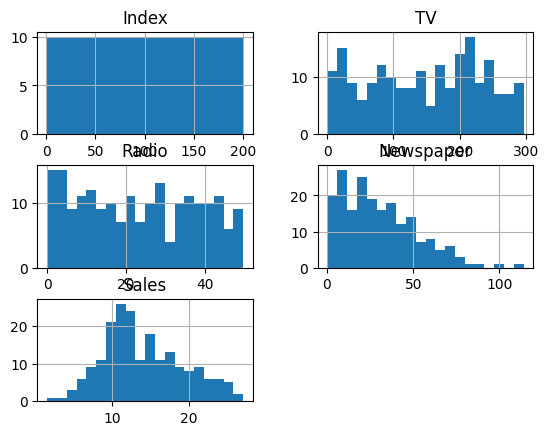

In [8]:
# Histograms to check the normality assumption of the dependent variable (Sales)

df.hist(bins=20)

By looking at the histogram, you can see that the "Sales" data appears to follow a roughly normal distribution. If it does, it suggests that the normality assumption is met.

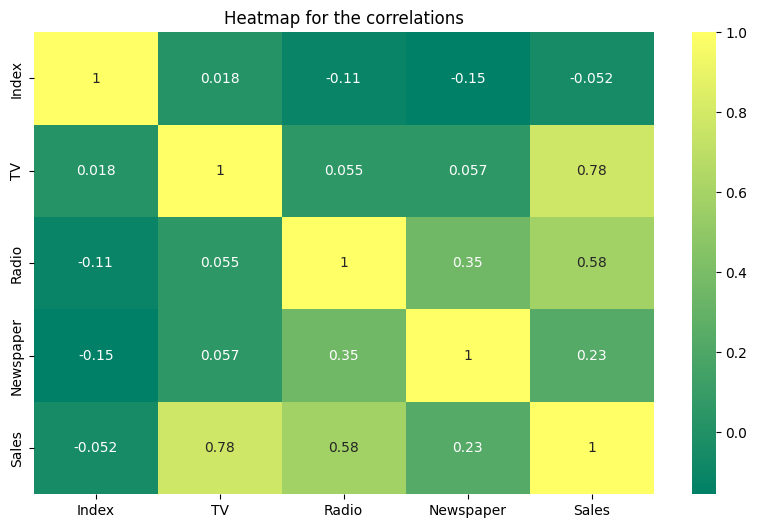

In [9]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="summer")
plt.title("Heatmap for the correlations")
plt.show()


Model preparation

In [10]:
# Split the data into train and test sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Model

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared: 0.90


The lower MSE and RMSE values indicate that the model is **making relatively accurate predictions.**
The high R² value (close to 1) suggests that the model is **explaining a significant portion of the variability in the Sales data**, indicating a **good fit.**

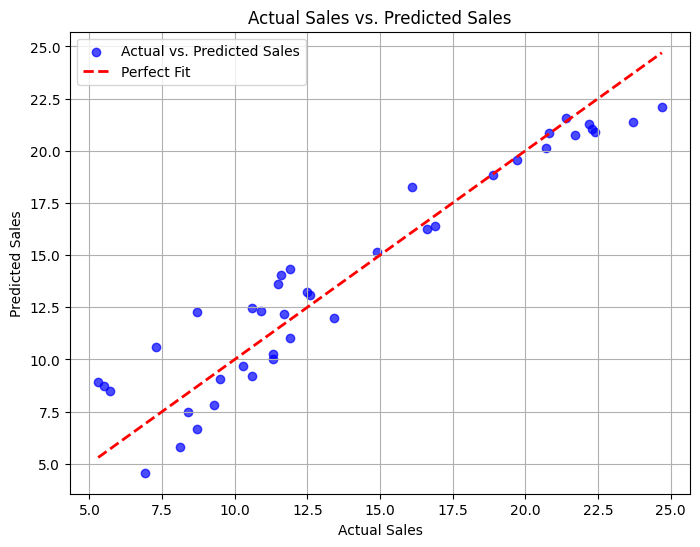

In [13]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [14]:
# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficients:
TV: 0.04
Radio: 0.19
Newspaper: 0.00
Intercept: 2.98


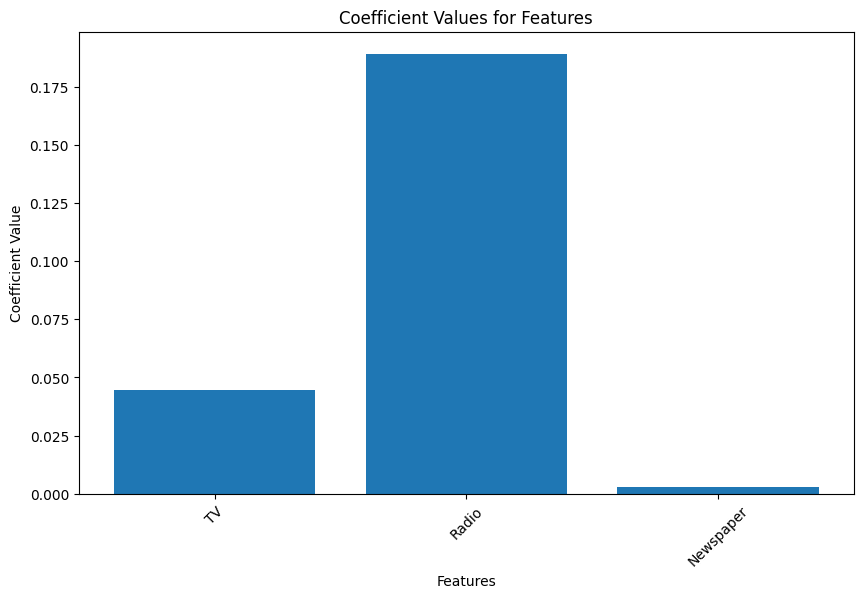

In [15]:
# Coefficient Visualization
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Features")
plt.xticks(rotation=45)
plt.show()


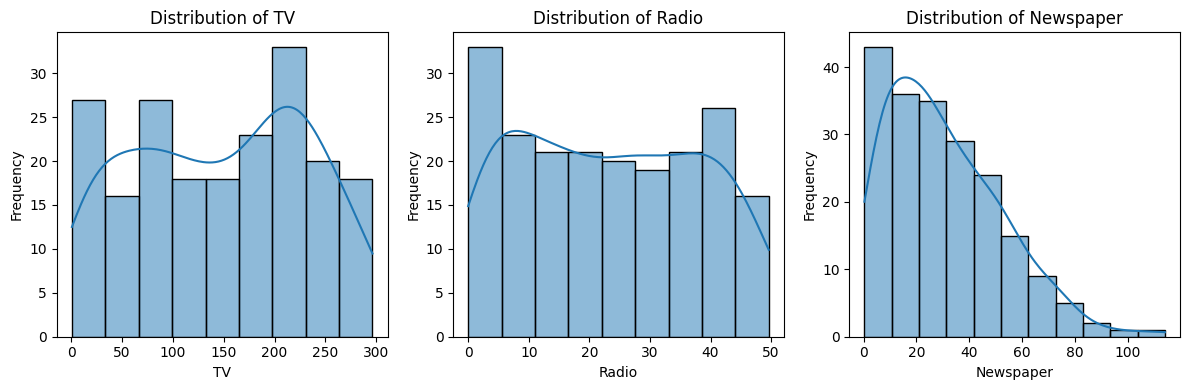

In [16]:
# Feature Distribution Plots
plt.figure(figsize=(12, 4))
for i, feature in enumerate(X.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


In [17]:
# Sample new data with the same feature columns as the original dataset
new_df = pd.DataFrame({
    'TV': [200, 150, 300],
    'Radio': [20, 10, 30],
    'Newspaper': [10, 5, 15]
})

new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)


Predictions for New Data:
[15.73648306 11.59425107 22.11519092]
